In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

import folium

In [2]:
DATA_PATH = 'data/'

In [3]:
fullDist = pd.read_csv(DATA_PATH+'fullDistance.csv',index_col=0)
fullTime = pd.read_csv(DATA_PATH+'fullTime.csv',index_col=0)
fullTraffic = pd.read_csv(DATA_PATH+'fullTraffic.csv',index_col=0)

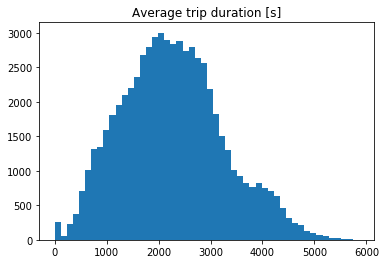

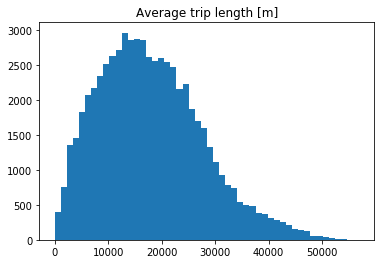

In [4]:
plt.hist(fullTime.values.ravel(),bins=50);
plt.title('Average trip duration [s]');

plt.figure()

plt.hist(fullDist.values.ravel(),bins=50);
plt.title('Average trip length [m]');

## Sparsing the graph with an RBF kernel

In [5]:
def rbf(df,sigma = None,thresh = None):
    
    if sigma == None:
        sigma = 1.5*np.std(df.values.ravel())
        print(sigma)
        
    rbf = np.exp(-np.power(df,2)/(2*sigma**2))
    
    if thresh is not None:
        rbf[rbf<thresh] = 0
    
    return rbf

### Distance

14550.307845721254


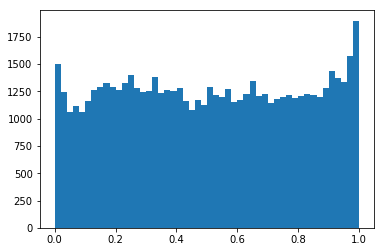

In [6]:
plt.hist(rbf(fullDist).values.ravel(),bins = 50);

14550.307845721254


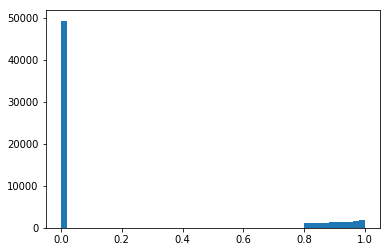

In [7]:
sparsed = rbf(fullDist,thresh=0.8)
plt.hist(sparsed.values.ravel(),bins = 50);

In [8]:
sparsed = ((sparsed[sparsed!=0]-0.8)*5).fillna(0) #minmax scaling

gpsMax = pd.read_csv(DATA_PATH+'finalGpsMax.csv',index_col=0)
drop = list(set(sparsed.index.values)-set(gpsMax['LocationID']))
sparsed = sparsed.loc[gpsMax['LocationID'].values]

for i,v in enumerate(sparsed.columns.values):
    if int(v) not in gpsMax['LocationID'].values:
        sparsed = sparsed.drop(v,axis=1)
gpsData = gpsMax
sparsed.head()

In [9]:
G = nx.from_numpy_matrix(sparsed.values)

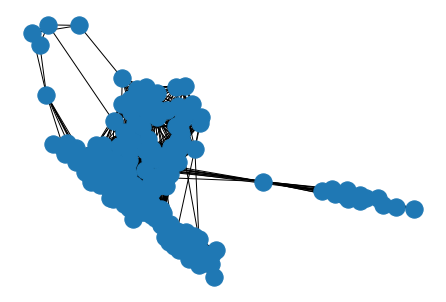

In [10]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
nx.draw(Gc)

In [11]:
#number of edges
print('Nodes: {} , Edges: {}'.format(len(Gc),len(Gc.edges())))

Nodes: 250 , Edges: 6997


In [12]:
gpsData = pd.read_csv(DATA_PATH+'finalGps.csv')

In [14]:
m = folium.Map(
    location=[40.7, -73.9],
    zoom_start=11,
    tiles='Stamen Terrain'
)

for i in range(len(gpsData)):
    lat = gpsData.iloc[i]['lat']
    lng = gpsData.iloc[i]['lng']
    zone = gpsData.iloc[i]['Zone']
    loc = gpsData.iloc[i]['LocationID']
    counts = gpsData.iloc[i]['Counts']
    
    folium.Marker(
        [lat,lng], 
                  popup='<i> {} </i>'.format(zone),
                  tooltip=zone,
                  icon=folium.Icon(color='red', icon='info-sign')
                 ).add_to(m)


    
for x, y in Gc.edges():
    points = [(gpsData['lat'].iloc[x], gpsData['lng'].iloc[x]),(gpsData['lat'].iloc[y], gpsData['lng'].iloc[y])]
    edge = folium.PolyLine(locations=points, weight=1, color='blue')
    edge.add_to(m)
m

In [27]:
drop_cols = sparsed.columns[list(set(G.nodes()) - set(Gc.nodes()))]
sparsed = sparsed.iloc[list(Gc.nodes())].drop(drop_cols,axis=1)

In [28]:
sparsed.to_csv(DATA_PATH+'sparsedDist.csv')

### Time

In [ ]:
plt.hist(rbf(fullTime).values.ravel(),bins = 50);

In [ ]:
sparsed = rbf(fullTime,thresh=0.7)
G = nx.from_numpy_matrix(sparsed.values)
Gc = max(nx.connected_component_subgraphs(G), key=len)
#number of edges
print('Nodes: {} , Edges: {}'.format(len(Gc),len(Gc.edges())))

In [ ]:
drop_cols = sparsed.columns[list(set(G.nodes()) - set(Gc.nodes()))]
sparsed = sparsed.iloc[list(Gc.nodes())].drop(drop_cols,axis=1)

In [ ]:
sparsed.to_csv(DATA_PATH+'sparsedTime.csv')

In [ ]:
plt.hist(rbf(fullTraffic).values.ravel(),bins = 50);

In [ ]:
sparsed = rbf(fullTraffic,thresh=0.7)
G = nx.from_numpy_matrix(sparsed.values)
Gc = max(nx.connected_component_subgraphs(G), key=len)
#number of edges
print('Nodes: {} , Edges: {}'.format(len(Gc),len(Gc.edges())))

In [ ]:
drop_cols = sparsed.columns[list(set(G.nodes()) - set(Gc.nodes()))]
sparsed = sparsed.iloc[list(Gc.nodes())].drop(drop_cols,axis=1)

In [ ]:
sparsed.to_csv(DATA_PATH+'sparsedTraffic.csv')

## Sparse the graph by boroughs

Done in previous notebook